<a href="https://www.kaggle.com/code/agathabarros/disney-data-set?scriptVersionId=128921102" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Setting configuration for clean visualization
plt.rc('font' , size = 12)
plt.rc('axes' , titlesize = 14)
plt.rc('axes' , labelsize = 12)
plt.rc('xtick' , labelsize = 12)
plt.rc('ytick' , labelsize = 12)
plt.rc('legend' , fontsize = 12)
plt.rc('figure' , titlesize = 14)
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

Reading Data

In [3]:
#reading data
df = pd.read_csv('/kaggle/input/walt-disney-character-dataset/disney_movies_total_gross.csv')
#viewing data
df.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


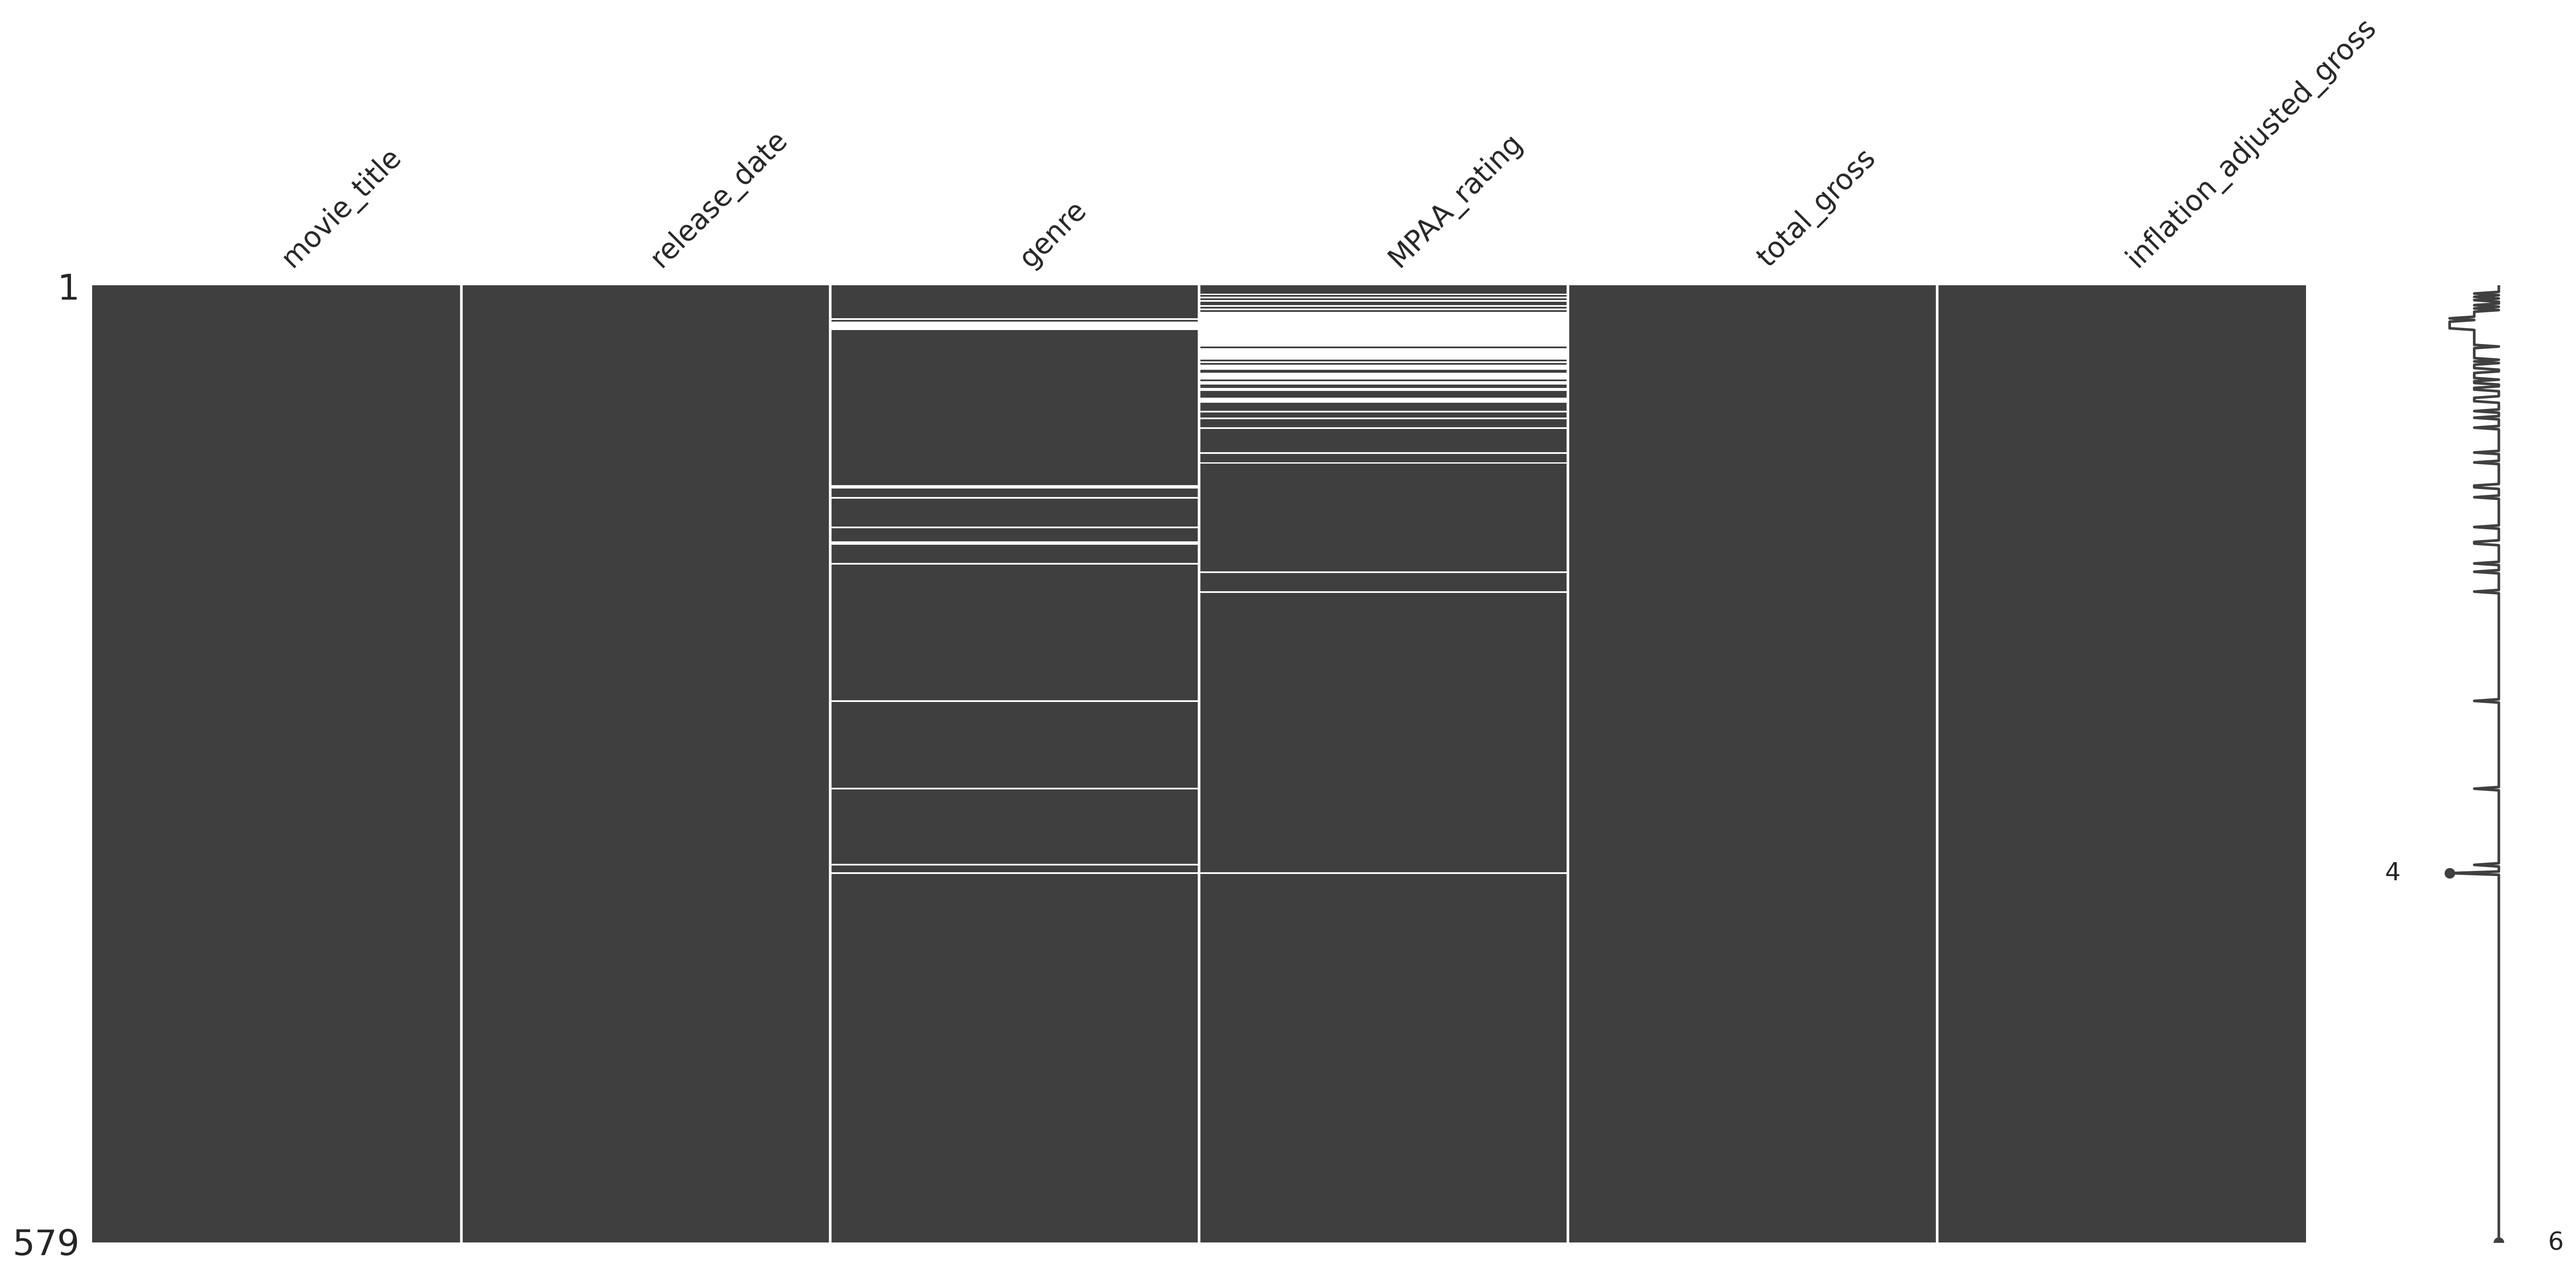

In [4]:
# Viewing data matrix
msno.matrix(df)
plt.show()

In [5]:
# Viewing null values 
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0:
        print(f" {i}'s null rate: {null_rate}%")

 genre's null rate: 2.936096718480138%
 MPAA_rating's null rate: 9.671848013816927%


We can see above that the genre's, and MPAA_rating has the highest null rates.

In [6]:
# describing data
df.describe(include = 'all').head(5)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
count,579,579,562,523,579,579
unique,573,553,12,5,576,576
top,The Jungle Book,"Dec 25, 1997",Comedy,PG,$0,$0
freq,3,3,182,187,4,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [8]:
df2 = df.genre.value_counts()
df2

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

**What type of genre has more movies on Disney?**


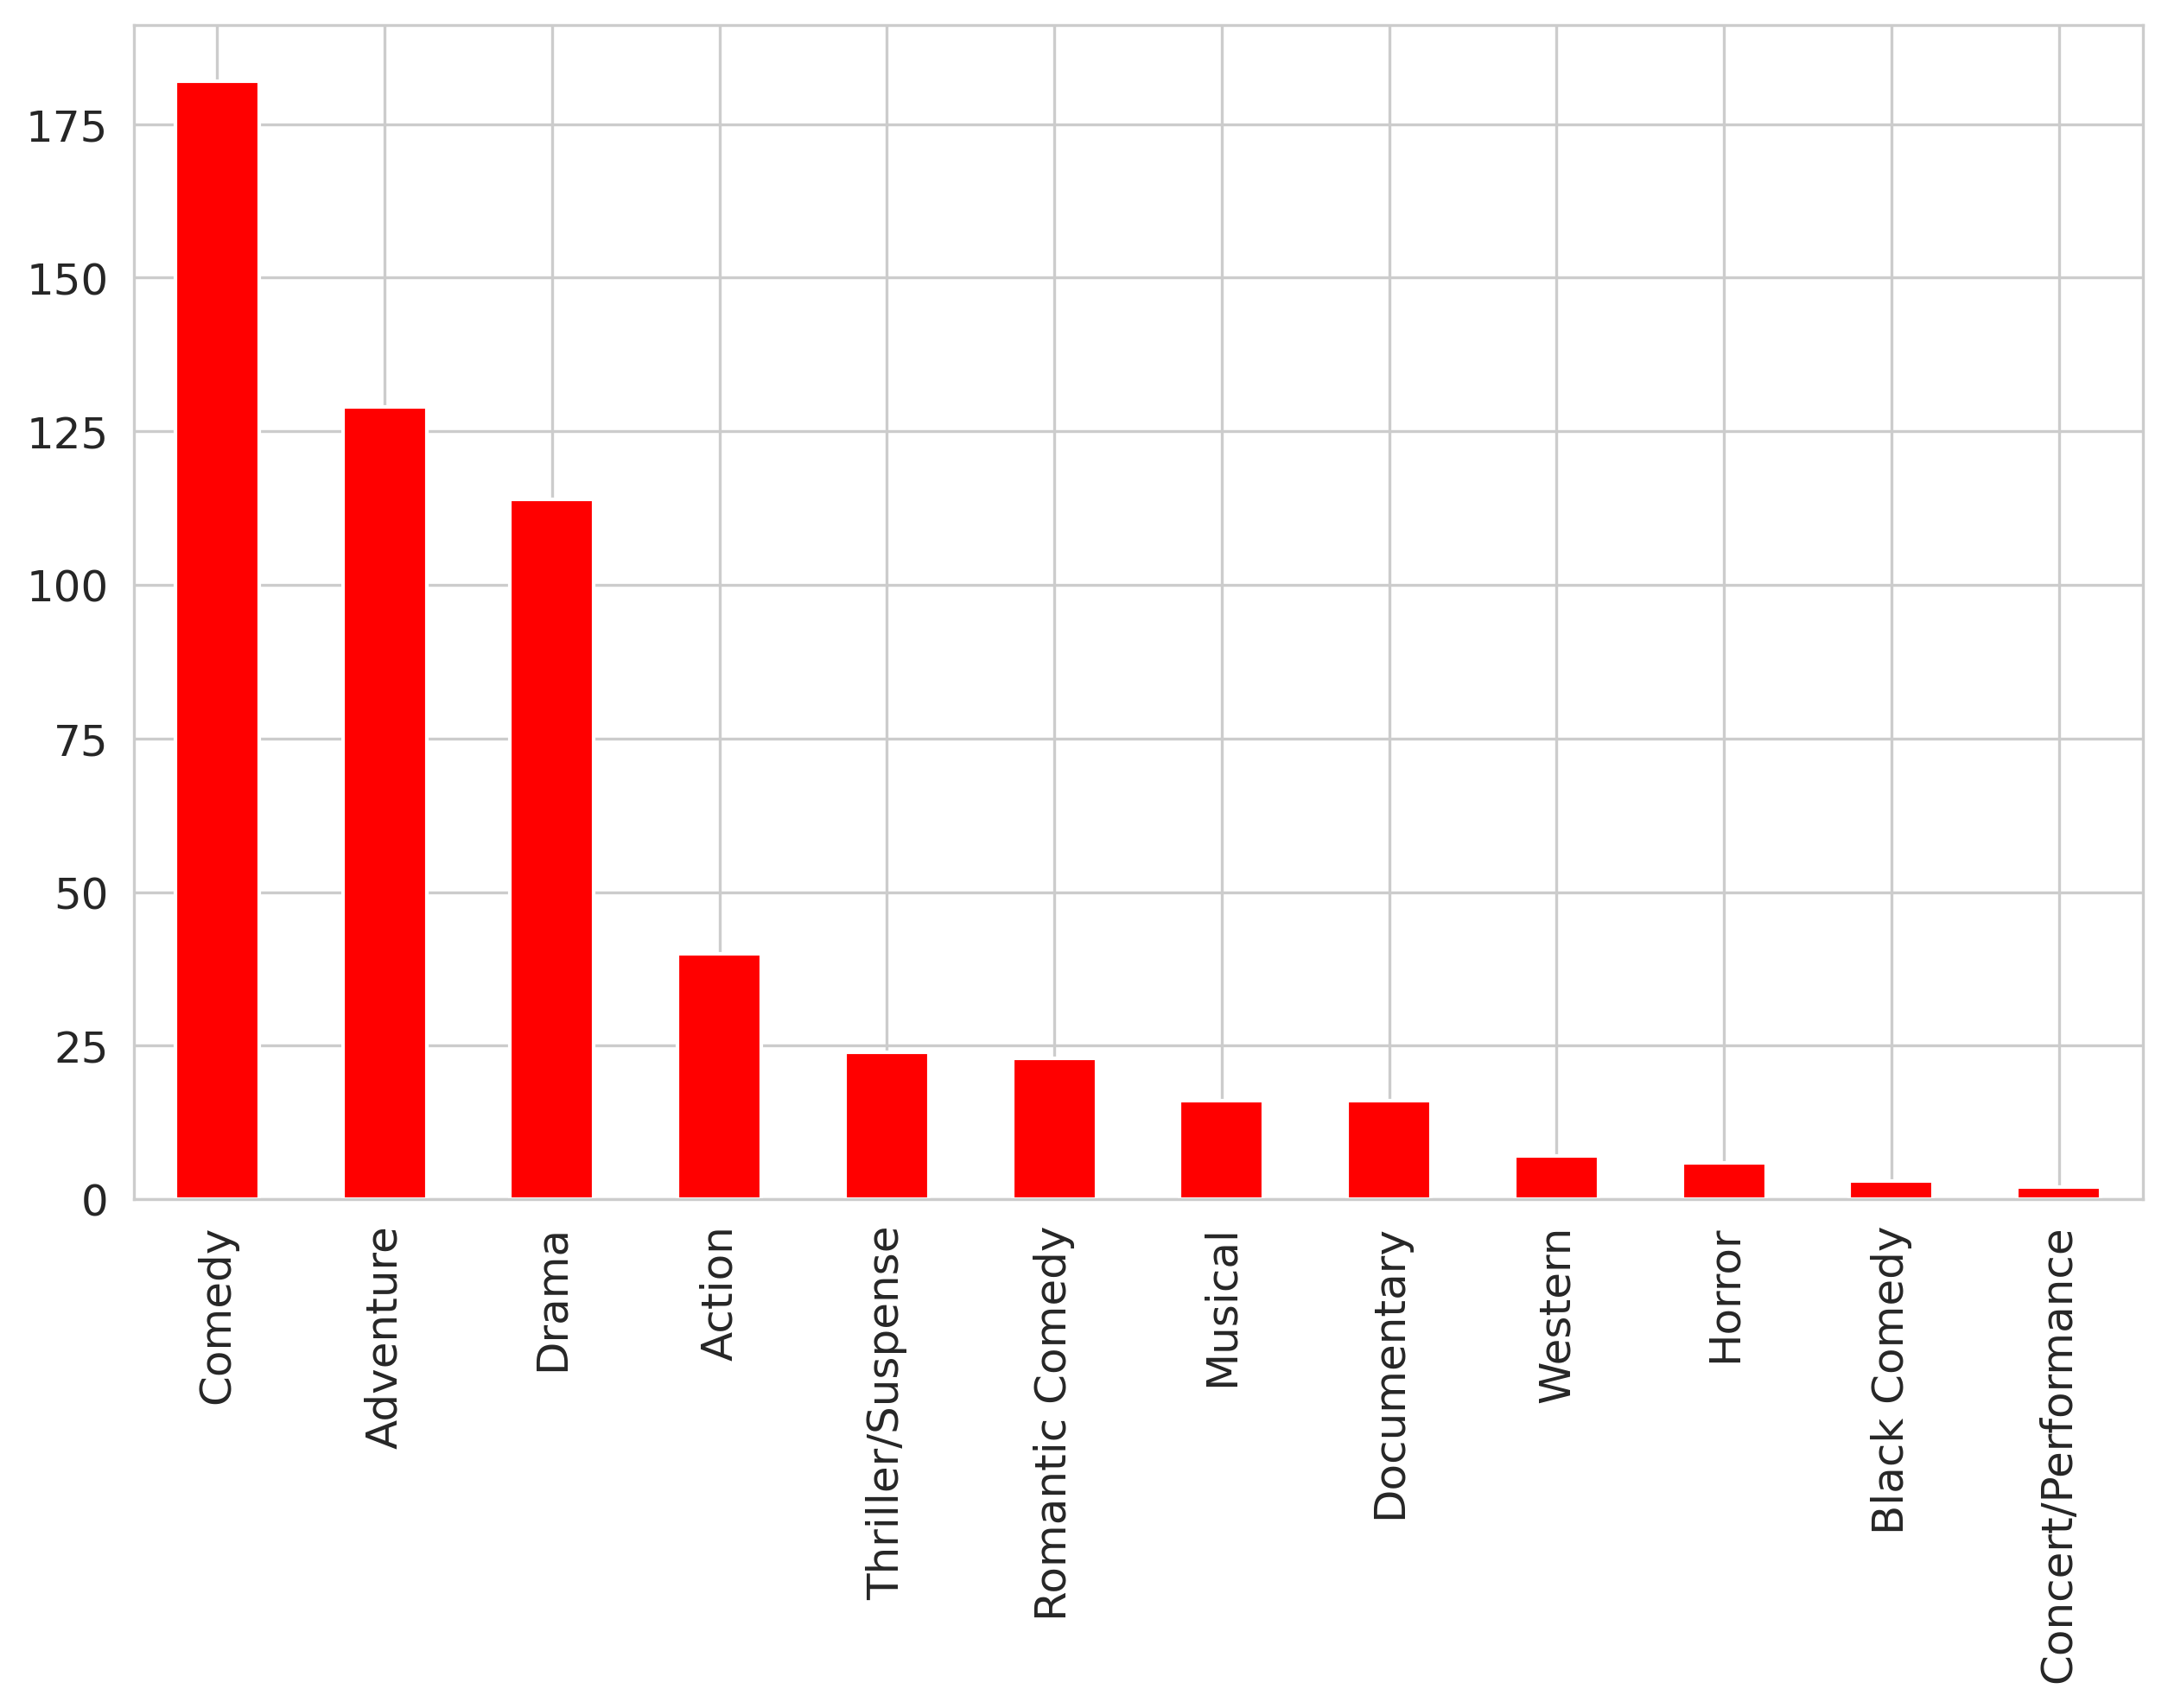

In [9]:
df2.plot(kind='bar', x='genre', y='total_gross', figsize=(10,6), colormap='prism');